In [1]:
import sys
sys.path.append('../')
from ksz_utils import *
import matplotlib.pyplot as plt
import importlib
import ksz_utils
importlib.reload(ksz_utils) 
from ksz_utils import *
theta = np.linspace(2, 6, 9)
sr2sqarcmin = 3282.8 * 60.**2

In [23]:
k=KSZSimulator(354)
z=k.z
theta_arcmin = np.degrees(k.BoxSize / k.AngDist(k.z)) * 60  # Convert to arcminutes
#Round up to the nearest integer, pixel size is 0.5 arcmin as in ACT
nPixels = 1000 #np.ceil(theta_arcmin / 0.5).astype(int) #1000
arcminPerPixel1000 = theta_arcmin / nPixels
print(f"Map size at z={z}: {theta_arcmin:.2f} arcmin in {nPixels} pixels {arcminPerPixel1000} arcmin/Pixel")
nPixels = np.ceil(theta_arcmin / 0.5).astype(int) #1000
arcminPerPixel = theta_arcmin / nPixels
print(f"Map size at z={z}: {theta_arcmin:.2f} arcmin in {nPixels} pixels {arcminPerPixel} arcmin/Pixel")

Map size at z=0.46777096651494054: 119.61 arcmin in 1000 pixels 0.11960560198426018 arcmin/Pixel
Map size at z=0.46777096651494054: 119.61 arcmin in 240 pixels 0.4983566749344174 arcmin/Pixel


In [46]:
theta_rad, beam = np.loadtxt('beam_example.txt',unpack=True)
def f_beam(tht):
    tht_in = theta_rad
    return np.interp(tht, tht_in, beam, period=np.pi)

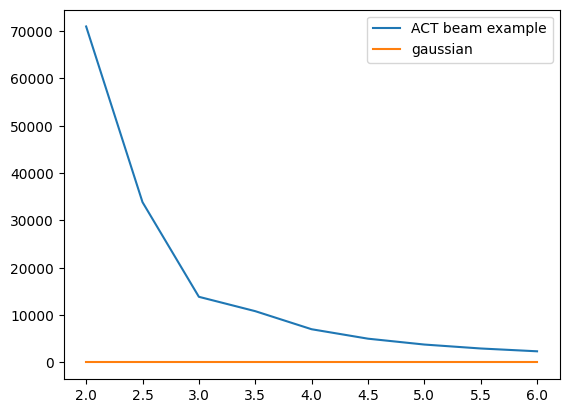

In [27]:
ACT_beam = []
Gaussian_beam = []
for t in theta:
    ACT_beam.append(f_beam(np.radians(t/60.)))
    Gaussian_beam.append(k.f_beam(np.radians(t/60.)))

plt.plot(theta,ACT_beam,label='ACT beam example')
plt.plot(theta,Gaussian_beam,label='gaussian')
plt.legend()
plt.show()

# one sim ~fids

Using nPixels=1000 for arcmin/pixel of 0.147
KeysView(NpzFile '/pscratch/sd/l/lindajin/CAMELS/IllustrisTNG/L50n512_SB35/SB35_777/data/Henry_profiles_gas_dm_star_bh_nPixel1000_R_lin0.04_2.5_log15_nbins20.npz' with keys: profiles, profile_names, r_bins, r_mids_array, m_halos_range)
KeysView(NpzFile '/pscratch/sd/l/lindajin/CAMELS/IllustrisTNG/L50n512_SB35/SB35_777/data/Henry_profiles_gas_dm_star_bh_nPixel1000_fwhm_1.6_R_lin0.04_2.5_log10_nbins20.npz' with keys: profiles, profile_names, r_bins, r_mids_array, m_halos...)
KeysView(NpzFile '/pscratch/sd/l/lindajin/CAMELS/IllustrisTNG/L50n512_SB35/SB35_777/data/Henry_profiles_gas_dm_star_bh_nPixel295_fwhm_1.6_R_lin0.04_2.5_log15_nbins20.npz' with keys: profiles, profile_names, r_bins, r_mids_array, m_halos...)


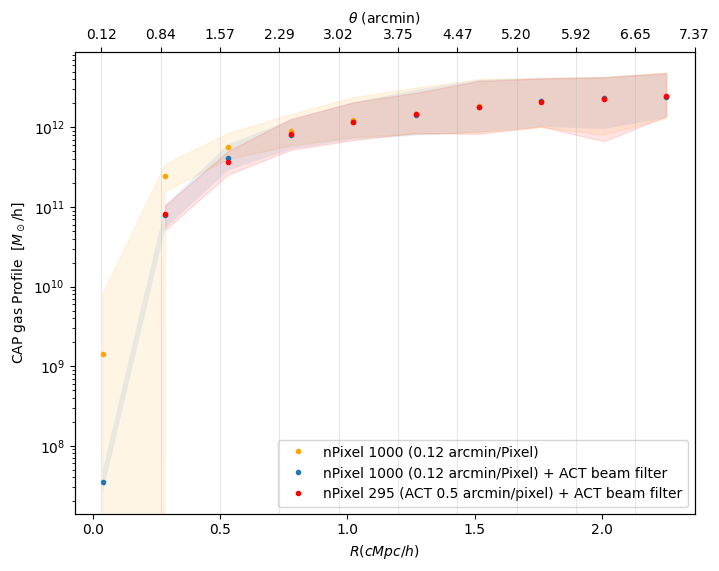

In [28]:
SB35_sim_index = 777
k=KSZSimulator(SB35_sim_index)
Henry_profiles_sim =  np.load(f'/pscratch/sd/l/lindajin/CAMELS/IllustrisTNG/L50n512_SB35/SB35_{SB35_sim_index}/data/'+ f"Henry_profiles_gas_dm_star_bh_nPixel1000_R_lin0.04_2.5_log15_nbins20.npz")

filt_func_names = Henry_profiles_sim['profile_names']
print(Henry_profiles_sim.keys())
r_bins =  Henry_profiles_sim['r_bins']

## CAP
profiles_g, profiles_m, profiles_s, profiles_bh = Henry_profiles_sim['profiles'][1]
upper_og = np.quantile(profiles_g, 0.25, axis=0)
lower_og = np.quantile(profiles_g, 0.75, axis=0)
median_og = np.median(profiles_g, axis=0)

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.plot(r_bins[:10], median_og[:10], '.', color='orange', linewidth=3, label='nPixel 1000 (0.12 arcmin/Pixel)')
ax.fill_between(r_bins[:10], lower_og[:10], upper_og[:10], color='orange', alpha=0.1)

Henry_profiles_sim =  np.load(f'/pscratch/sd/l/lindajin/CAMELS/IllustrisTNG/L50n512_SB35/SB35_{SB35_sim_index}/data/'+ f"Henry_profiles_gas_dm_star_bh_nPixel1000_fwhm_1.6_R_lin0.04_2.5_log10_nbins20.npz")

filt_func_names = Henry_profiles_sim['profile_names']
print(Henry_profiles_sim.keys())
r_bins =  Henry_profiles_sim['r_bins']

## CAP
profiles_g, profiles_m, profiles_s, profiles_bh = Henry_profiles_sim['profiles'][1]
upper_ACT = np.quantile(profiles_g, 0.25, axis=0)
lower_ACT = np.quantile(profiles_g, 0.75, axis=0)
median_ACT = np.median(profiles_g, axis=0)

ax.plot(r_bins[:10], median_ACT[:10], '.',  linewidth=3, label='nPixel 1000 (0.12 arcmin/Pixel) + ACT beam filter')
ax.fill_between(r_bins[:10], lower_ACT[:10], upper_ACT[:10],  alpha=0.1)

Henry_profiles_sim =  np.load(f'/pscratch/sd/l/lindajin/CAMELS/IllustrisTNG/L50n512_SB35/SB35_{SB35_sim_index}/data/'+ f"Henry_profiles_gas_dm_star_bh_nPixel295_fwhm_1.6_R_lin0.04_2.5_log15_nbins20.npz")

filt_func_names = Henry_profiles_sim['profile_names']
print(Henry_profiles_sim.keys())
r_bins =  Henry_profiles_sim['r_bins']

## CAP
profiles_g, profiles_m, profiles_s, profiles_bh = Henry_profiles_sim['profiles'][1]
upper = np.quantile(profiles_g, 0.25, axis=0)
lower = np.quantile(profiles_g, 0.75, axis=0)
median = np.median(profiles_g, axis=0)

ax.plot(r_bins[:10], median[:10], '.', color = 'r',  linewidth=3, label='nPixel 295 (ACT 0.5 arcmin/pixel) + ACT beam filter')
ax.fill_between(r_bins[:10], lower[:10], upper[:10], color='r', alpha=0.1)

ax2 = ax.twiny()

# Convert r_bins to thta_bins (assuming you have z and AngDist function available)
# You'll need to replace this with your actual conversion
AngDis = k.AngDist(k.z)  # Make sure z is defined
thta_bins_plot = np.arctan((r_bins[:11]) / AngDis) * 180 / np.pi * 60  # Convert to arcmin

ax2.set_xlim(ax.get_xlim())
ax2.set_xticks(r_bins[:11])
ax2.set_xticklabels([f'{tb:.2f}' for tb in thta_bins_plot])
ax2.set_xlabel(r'$\theta$ (arcmin)')

#ax.set_xscale('log')
ax.set_xlabel('$R (cMpc/h)$')
ax.set_ylabel(r'CAP gas Profile  [$M_\odot$/h]')
ax.set_yscale('log')
plt.grid(True, alpha=0.3, which='both')
ax.legend()
plt.savefig('../figs/CAMELS_CAP_z0.47_nPixel_ACTbeam_comparison.png')
plt.show()


In [30]:
importlib.reload(ksz_utils) 
from ksz_utils import *
k=KSZSimulator(SB35_sim_index)
temp_ksz_gnfw1000_gaussian_1D = k.make_a_obs_profile_sim_rho(theta,median_og,r_bins)
#temp_ksz_gnfw1000_gaussianACT_1D = k.make_a_obs_profile_sim_rho(theta,median_og,r_bins,f_beam=f_beam)
temp_ksz_gnfw1000 = k.make_a_obs_profile_sim_rho(theta,median_og,r_bins, gaussian_beam=False)
temp_ksz_gnfw1000_gaussian_ACT = k.make_a_obs_profile_sim_rho(theta,median_ACT,r_bins, gaussian_beam=False)
temp_ksz_gnfw1000_gaussian_1D_ACT = k.make_a_obs_profile_sim_rho(theta,median_ACT,r_bins)

k=KSZSimulator(SB35_sim_index,295)
temp_ksz_gnfw295_ACT = k.make_a_obs_profile_sim_rho(theta,median[0:],r_bins[0:], gaussian_beam=False)
temp_ksz_gnfw295_1D = k.make_a_obs_profile_sim_rho(theta,median[0:],r_bins[0:], gaussian_beam=True)


Using nPixels=1000 for arcmin/pixel of 0.147
Using nPixels=295 for arcmin/pixel of 0.500


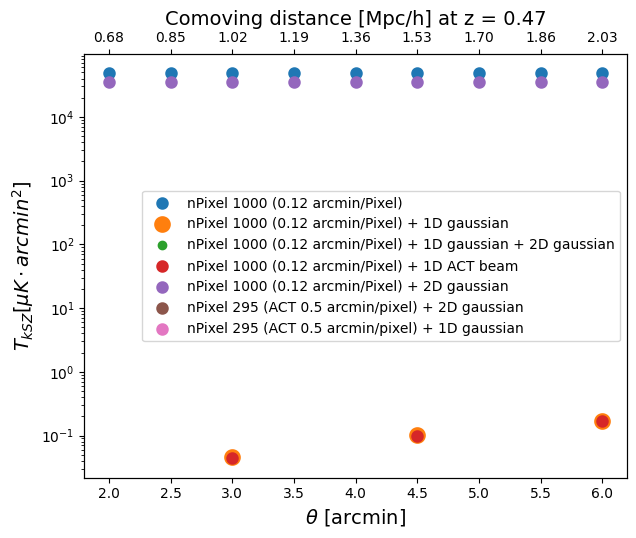

In [32]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(7,5.5))

# Original plot on left y-axis
ax1.scatter(theta, temp_ksz_gnfw1000*sr2sqarcmin, lw=3, label ='nPixel 1000 (0.12 arcmin/Pixel)')
ax1.scatter(theta, temp_ksz_gnfw1000_gaussian_1D*sr2sqarcmin, lw=6, label ='nPixel 1000 (0.12 arcmin/Pixel) + 1D gaussian')
ax1.scatter(theta, temp_ksz_gnfw1000_gaussian_1D_ACT*sr2sqarcmin, lw=1, label ='nPixel 1000 (0.12 arcmin/Pixel) + 1D gaussian + 2D gaussian')

ax1.scatter(theta, temp_ksz_gnfw1000_gaussian_1D_ACT*sr2sqarcmin, lw=3, label ='nPixel 1000 (0.12 arcmin/Pixel) + 1D ACT beam')

ax1.scatter(theta, temp_ksz_gnfw1000_gaussian_ACT*sr2sqarcmin, lw=3, label ='nPixel 1000 (0.12 arcmin/Pixel) + 2D gaussian')
ax1.scatter(theta, temp_ksz_gnfw295_ACT*sr2sqarcmin, lw=3, label='nPixel 295 (ACT 0.5 arcmin/pixel) + 2D gaussian')
ax1.scatter(theta, temp_ksz_gnfw295_1D*sr2sqarcmin, lw=3, label='nPixel 295 (ACT 0.5 arcmin/pixel) + 1D gaussian')


ax1.legend()
ax1.set_xlabel(r'$\theta$ [arcmin]', size=14)
ax1.set_ylabel(r'$T_{kSZ} [\mu K \cdot arcmin^2]$', size=14)
ax1.set_yscale('log')
# Create second x-axis on top for r_bins
ax3 = ax1.twiny()

# Calculate r_bins from theta
# Reverse the conversion: r_bins = AngDis * tan(theta_rad)
AngDis = k.AngDist(k.z) 
theta_rad = np.radians(theta / 60.)  # Convert theta from arcmin to radians
r_bins_calc = AngDis * np.tan(theta_rad)  # Calculate corresponding r_bins

# Set the same x-limits as the bottom axis
ax3.set_xlim(ax1.get_xlim())
ax3.set_xticks(theta)
ax3.set_xticklabels([f'{r:.2f}' for r in r_bins_calc])
ax3.set_xlabel(f'Comoving distance [Mpc/h] at z = {k.z:.2f}', size=14)

plt.savefig('Tksz_CAP_z0.47_DESI.png')
plt.show()

# Henry's SZstacker vs. 2D profiles 

In [36]:
SB35_sim_index = 419
k=KSZSimulator(SB35_sim_index)
Henry_profiles_sim =  np.load(f'/pscratch/sd/l/lindajin/CAMELS/IllustrisTNG/L50n512_SB35/SB35_{SB35_sim_index}/data/'+ f"Henry_profiles_gas_dm_star_bh_nPixel1000_R_lin0.04_2.5_log15_nbins20.npz")

filt_func_names = Henry_profiles_sim['profile_names']
print(Henry_profiles_sim.keys())
r_bins =  Henry_profiles_sim['r_bins']

## CAP
profiles_g, profiles_m, profiles_s, profiles_bh = Henry_profiles_sim['profiles'][1]
upper_og = np.quantile(profiles_g, 0.25, axis=0)
lower_og = np.quantile(profiles_g, 0.75, axis=0)
median_og = np.median(profiles_g, axis=0)
temp_ksz_gnfw1000_gaussian_1D = k.make_a_obs_profile_sim_rho(theta,median_og,r_bins)

kSZ_1000 = np.load(f'/pscratch/sd/l/lindajin/CAMELS/IllustrisTNG/L50n512_SB35/SB35_{SB35_sim_index}/data/'+ f"kSZ_CAP_profiles_nPixel1000_fwhm_1.6_theta_lin1_6_nbins9.npz")
kSZ_ACT_res = np.load(f'/pscratch/sd/l/lindajin/CAMELS/IllustrisTNG/L50n512_SB35/SB35_{SB35_sim_index}/data/'+ f"kSZ_CAP_profiles_nPixel314_fwhm_1.6_theta_lin1_6_nbins9.npz")
print(kSZ_ACT_res.keys(),kSZ_1000['profiles'].shape)

print(sum(kSZ_1000['profiles']>0),sum(kSZ_ACT_res['profiles']>0))

Using nPixels=1000 for arcmin/pixel of 0.157
KeysView(NpzFile '/pscratch/sd/l/lindajin/CAMELS/IllustrisTNG/L50n512_SB35/SB35_419/data/Henry_profiles_gas_dm_star_bh_nPixel1000_R_lin0.04_2.5_log15_nbins20.npz' with keys: profiles, profile_names, r_bins, r_mids_array, m_halos_range)
KeysView(NpzFile '/pscratch/sd/l/lindajin/CAMELS/IllustrisTNG/L50n512_SB35/SB35_419/data/kSZ_CAP_profiles_nPixel314_fwhm_1.6_theta_lin1_6_nbins9.npz' with keys: profiles, radii_arcmin, r_arcmin_mids_array, filter_type, particle_type...) (68, 9)
[33 32 32 33 34 33 30 32 32] [34 32 33 33 34 32 32 33 32]


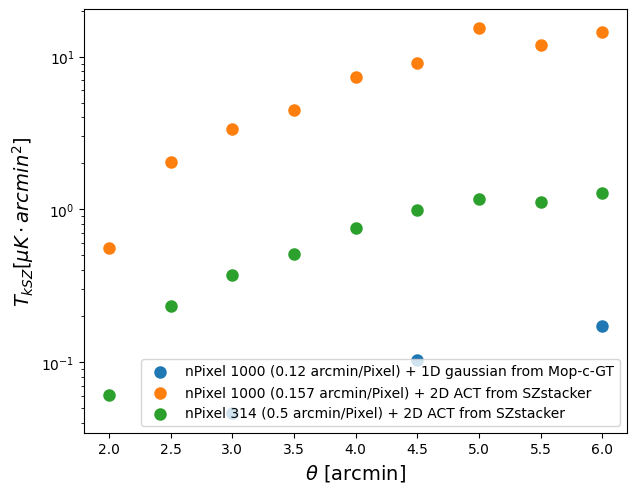

In [33]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(7,5.5))
theta = np.linspace(2, 6, 9)

# Original plot on left y-axis
ax1.scatter(theta, temp_ksz_gnfw1000_gaussian_1D*sr2sqarcmin, lw=3, label ='nPixel 1000 (0.12 arcmin/Pixel) + 1D gaussian from Mop-c-GT')

theta_ = kSZ_ACT_res['radii_arcmin']
# Calculate median only from positive values
median_1000 = np.array([np.median(kSZ_1000['profiles'][:, i][kSZ_1000['profiles'][:, i] > 0]) 
                       for i in range(kSZ_1000['profiles'].shape[1])])

median_ACT = np.array([np.median(kSZ_ACT_res['profiles'][:, i][kSZ_ACT_res['profiles'][:, i] > 0]) 
                      for i in range(kSZ_ACT_res['profiles'].shape[1])])
ax1.scatter(theta,median_1000, lw=3, label ='nPixel 1000 (0.157 arcmin/Pixel) + 2D ACT from SZstacker')
ax1.scatter(theta, median_ACT, lw=3, label ='nPixel 314 (0.5 arcmin/Pixel) + 2D ACT from SZstacker')


ax1.legend()
ax1.set_xlabel(r'$\theta$ [arcmin]', size=14)
ax1.set_ylabel(r'$T_{kSZ} [\mu K \cdot arcmin^2]$', size=14)
ax1.set_yscale('log')

# # Create second x-axis on top for r_bins
# ax3 = ax1.twiny()


# # Calculate r_bins from theta
# # Reverse the conversion: r_bins = AngDis * tan(theta_rad)
# AngDis = k.AngDist(k.z) 
# theta_rad = np.radians(theta / 60.)  # Convert theta from arcmin to radians
# r_bins_calc = AngDis * np.tan(theta_rad)  # Calculate corresponding r_bins
# # Set the same x-limits as the bottom axis
# ax3.set_xlim(ax1.get_xlim())
# ax3.set_xticks(theta)
# ax3.set_xticklabels([f'{r:.2f}' for r in r_bins_calc])
# ax3.set_xlabel(f'Comoving distance [Mpc/h] at z = {k.z:.2f}', size=14)
plt.show()

# all sims vs. DESI

In [40]:
! python ../ksz_utils.py 

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('../')
from ksz_utils import KSZSimulator
k=KSZSimulator(354)

temp_ksz_sims_AGN1 = np.load('ksz_profiles_AAGN1_varying_sims.npy')
AAGN1 = np.load('AAGN1_varying_vals.npy')

temp_ksz_sims = np.load('ksz_profiles_sims.npy')
temp_ksz_sims_all_halos = np.load('ksz_profiles_sims_halos.npy')
mass_halos_ranges = np.load('mass_halos_ranges.npy')


upper = np.quantile(temp_ksz_sims, 0.25, axis=0)
lower = np.quantile(temp_ksz_sims, 0.75, axis=0)
median = np.median(temp_ksz_sims, axis=0)
k=KSZSimulator(354)

distances = np.linalg.norm(temp_ksz_sims - median, axis=1)
median_index = np.argmin(distances)
print(f'median profile is at sim {median_index}')
print(temp_ksz_sims.shape)

theta = np.linspace(1, 6, 9)
sr2sqarcmin = 3282.8 * 60.**2

Using nPixels=1000 for arcmin/pixel of 0.120
Using nPixels=1000 for arcmin/pixel of 0.120
median profile is at sim 419
(1024, 9)


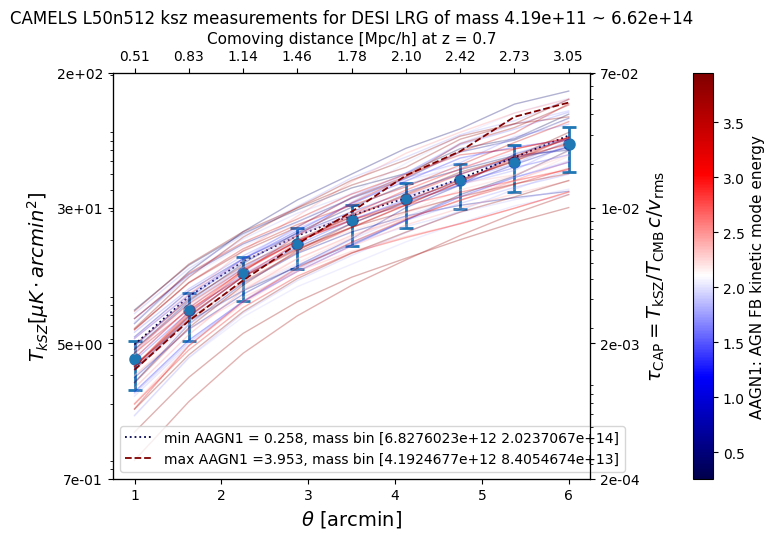

In [11]:

fig, ax1 = plt.subplots(figsize=(8,5.5))

# Original plot on left y-axis
ax1.scatter(theta, median*sr2sqarcmin, lw=3)
yerr_lower = np.abs(median*sr2sqarcmin - lower*sr2sqarcmin)
yerr_upper =  np.abs(upper*sr2sqarcmin - median*sr2sqarcmin)
yerr = [yerr_lower, yerr_upper]
ax1.errorbar(theta, median*sr2sqarcmin, yerr=yerr, 
             fmt='o', capsize=5, capthick=2, linewidth=2, markersize=6)
AAGN1_log = np.log10(AAGN1)
for i in range(len(temp_ksz_sims_AGN1)):
    if i == 0:
        ax1.plot(theta, temp_ksz_sims_AGN1[i]*sr2sqarcmin, ls=':',linewidth=1.3, color=plt.cm.seismic((AAGN1_log[i] - AAGN1_log.min()) / (AAGN1_log.max() - AAGN1_log.min())),
            label =f'min AAGN1 = {AAGN1[i]:.3f}, mass bin {mass_halos_ranges[i]}')
    elif i == len(temp_ksz_sims_AGN1)-1:
         ax1.plot(theta, temp_ksz_sims_AGN1[i]*sr2sqarcmin, ls='--',linewidth=1.3, color=plt.cm.seismic((AAGN1_log[i] - AAGN1_log.min()) / (AAGN1_log.max() - AAGN1_log.min())),
            label =f'max AAGN1 ={AAGN1[i]:.3f}, mass bin {mass_halos_ranges[i]}')
    else:
        pass
        ax1.plot(theta, temp_ksz_sims_AGN1[i]*sr2sqarcmin, linewidth=1, color=plt.cm.seismic((AAGN1_log[i] - AAGN1_log.min()) / (AAGN1_log.max() - AAGN1_log.min())),
                 alpha=0.3
            )
# Add colorbar for AAGN1 values
sm = plt.cm.ScalarMappable(cmap=plt.cm.seismic, 
                          norm=plt.Normalize(vmin=AAGN1.min(), vmax=AAGN1.max()))
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax1, pad=0.15)  # pad=0.15 moves it farther right
cbar.set_label('AAGN1: AGN FB kinetic mode energy', size=11)
ax1.legend()
ax1.set_xlabel(r'$\theta$ [arcmin]', size=14)
ax1.set_ylabel(r'$T_{kSZ} [\mu K \cdot arcmin^2]$', size=14)
ax1.set_yscale('log')

# Set exactly 4 ticks on left y-axis
y1_min, y1_max = ax1.get_ylim()
y1_ticks = np.logspace(np.log10(y1_min), np.log10(y1_max), 4)
ax1.set_yticks(y1_ticks)
ax1.set_yticklabels([f'{tick:.0e}' for tick in y1_ticks])
ax1.tick_params(axis='y', which='both', left=True, right=False)

# Create second y-axis on the right
ax2 = ax1.twinx()

# Define the proportionality constant
conversion_factor = 1/(k.v_rms * k.TCMB* 1e6)  # Convert to optical depth units

# Set the limits to be proportional
ax2.set_ylim(y1_min * conversion_factor, y1_max * conversion_factor)
ax2.set_ylabel(r"$\tau_{\mathrm{CAP}} = T_{\mathrm{kSZ}}/T_{\mathrm{CMB}} \, c/v_{\mathrm{rms}}$", size=14)
ax2.set_yscale('log')

# Set exactly 4 ticks on right y-axis
y2_min, y2_max = ax2.get_ylim()
y2_ticks = np.logspace(np.log10(y2_min), np.log10(y2_max), 4)
ax2.set_yticks(y2_ticks)
ax2.set_yticklabels([f'{tick:.0e}' for tick in y2_ticks])
ax2.tick_params(axis='y', which='both', left=False, right=True)

# Create second x-axis on top for r_bins
ax3 = ax1.twiny()

# Calculate r_bins from theta
# Reverse the conversion: r_bins = AngDis * tan(theta_rad)
AngDis = k.AngDist(0.7) 
theta_rad = np.radians(theta / 60.)  # Convert theta from arcmin to radians
r_bins_calc = AngDis * np.tan(theta_rad)  # Calculate corresponding r_bins

# Set the same x-limits as the bottom axis
ax3.set_xlim(ax1.get_xlim())
ax3.set_xticks(theta)
ax3.set_xticklabels([f'{r:.2f}' for r in r_bins_calc])
ax3.set_xlabel(f'Comoving distance [Mpc/h] at z = 0.7', size=11)
plt.title('CAMELS L50n512 ksz measurements for DESI LRG of mass 4.19e+11 ~ 6.62e+14')
plt.tight_layout()
plt.savefig('204_sims_Tksz_CAP_z0.7_DESI_AAGN1_varying_sims.png')
plt.show()

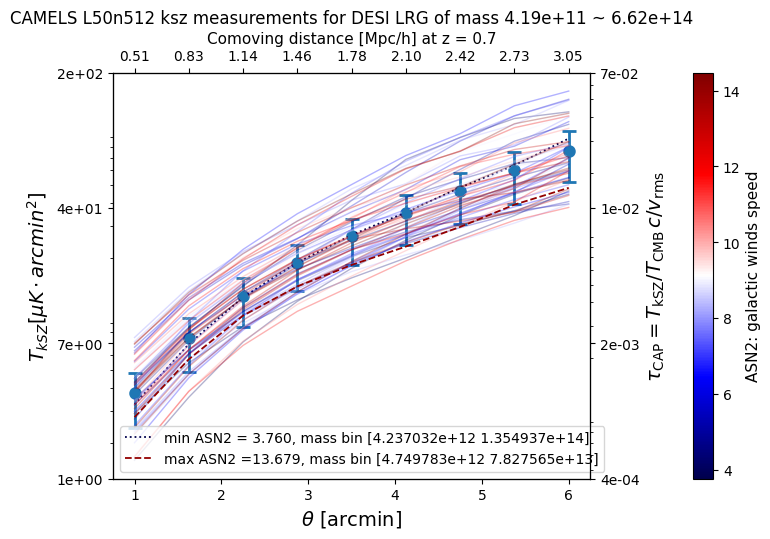

In [13]:
from ksz_utils import KSZSimulator
temp_ksz_sims_ASN2 = np.load('ksz_profiles_ASN2_varying_sims.npy')
ASN2 = np.load('ASN2_varying_vals.npy')
mass_halos_ranges = np.load('mass_halos_ranges_ASN2_varying_sims.npy')

k=KSZSimulator(354)

theta = np.linspace(1, 6, 9)
sr2sqarcmin = 3282.8 * 60.**2

fig, ax1 = plt.subplots(figsize=(8,5.5))

# Original plot on left y-axis
ax1.scatter(theta, median*sr2sqarcmin, lw=3)
ax1.errorbar(theta, median*sr2sqarcmin, yerr=yerr, 
             fmt='o', capsize=5, capthick=2, linewidth=2, markersize=6)
ASN2_log = np.log10(ASN2)
for i in range(len(temp_ksz_sims_ASN2)):
    if i == 0:
        ax1.plot(theta, temp_ksz_sims_ASN2[i]*sr2sqarcmin, ls=':',linewidth=1.3, color=plt.cm.seismic((ASN2_log[i] - ASN2_log.min()) / (ASN2_log.max() - ASN2_log.min())),
            label =f'min ASN2 = {ASN2[i]:.3f}, mass bin {mass_halos_ranges[i]}')
    elif i == len(temp_ksz_sims_AGN1)-1:
         ax1.plot(theta, temp_ksz_sims_ASN2[i]*sr2sqarcmin, ls='--',linewidth=1.3, color=plt.cm.seismic((ASN2_log[i] - ASN2_log.min()) / (ASN2_log.max() - ASN2_log.min())),
            label =f'max ASN2 ={ASN2[i]:.3f}, mass bin {mass_halos_ranges[i]}')
    else:
        pass
        ax1.plot(theta, temp_ksz_sims_ASN2[i]*sr2sqarcmin, linewidth=1, color=plt.cm.seismic((ASN2_log[i] - ASN2_log.min()) / (ASN2_log.max() - ASN2_log.min())),
                 alpha=0.3
            )
# Add colorbar for ASN2 values
sm = plt.cm.ScalarMappable(cmap=plt.cm.seismic, 
                          norm=plt.Normalize(vmin=ASN2.min(), vmax=ASN2.max()))
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax1, pad=0.15)  # pad=0.15 moves it farther right
cbar.set_label('ASN2: galactic winds speed', size=11)
ax1.legend()
ax1.set_xlabel(r'$\theta$ [arcmin]', size=14)
ax1.set_ylabel(r'$T_{kSZ} [\mu K \cdot arcmin^2]$', size=14)
ax1.set_yscale('log')

# Set exactly 4 ticks on left y-axis
y1_min, y1_max = ax1.get_ylim()
y1_ticks = np.logspace(np.log10(y1_min), np.log10(y1_max), 4)
ax1.set_yticks(y1_ticks)
ax1.set_yticklabels([f'{tick:.0e}' for tick in y1_ticks])
ax1.tick_params(axis='y', which='both', left=True, right=False)

# Create second y-axis on the right
ax2 = ax1.twinx()

# Define the proportionality constant
conversion_factor = 1/(k.v_rms * k.TCMB* 1e6)  # Convert to optical depth units

# Set the limits to be proportional
ax2.set_ylim(y1_min * conversion_factor, y1_max * conversion_factor)
ax2.set_ylabel(r"$\tau_{\mathrm{CAP}} = T_{\mathrm{kSZ}}/T_{\mathrm{CMB}} \, c/v_{\mathrm{rms}}$", size=14)
ax2.set_yscale('log')

# Set exactly 4 ticks on right y-axis
y2_min, y2_max = ax2.get_ylim()
y2_ticks = np.logspace(np.log10(y2_min), np.log10(y2_max), 4)
ax2.set_yticks(y2_ticks)
ax2.set_yticklabels([f'{tick:.0e}' for tick in y2_ticks])
ax2.tick_params(axis='y', which='both', left=False, right=True)

# Create second x-axis on top for r_bins
ax3 = ax1.twiny()

# Calculate r_bins from theta
# Reverse the conversion: r_bins = AngDis * tan(theta_rad)
AngDis = k.AngDist(0.7) 
theta_rad = np.radians(theta / 60.)  # Convert theta from arcmin to radians
r_bins_calc = AngDis * np.tan(theta_rad)  # Calculate corresponding r_bins

# Set the same x-limits as the bottom axis
ax3.set_xlim(ax1.get_xlim())
ax3.set_xticks(theta)
ax3.set_xticklabels([f'{r:.2f}' for r in r_bins_calc])
ax3.set_xlabel(f'Comoving distance [Mpc/h] at z = 0.7', size=11)
plt.title('CAMELS L50n512 ksz measurements for DESI LRG of mass 4.19e+11 ~ 6.62e+14')
plt.tight_layout()
plt.savefig('204_sims_Tksz_CAP_z0.7_DESI_ASN2_varying_sims.png')
plt.show()

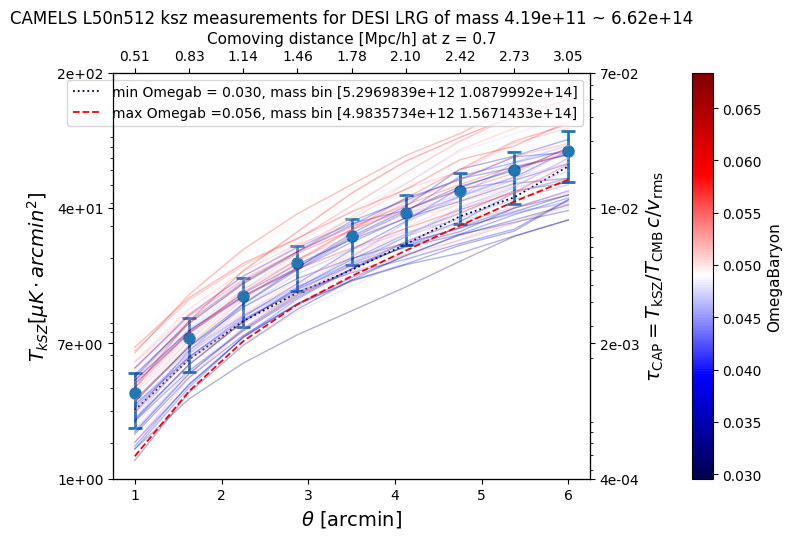

In [23]:
temp_ksz_sims_Omegab = np.load('ksz_profiles_Omegab_varying_sims.npy')
Omegab = np.load('Omegab_varying_vals.npy')
mass_halos_ranges = np.load('mass_halos_ranges_Omegab_varying_sims.npy')

fig, ax1 = plt.subplots(figsize=(8,5.5))

# Original plot on left y-axis
ax1.scatter(theta, median*sr2sqarcmin, lw=3)

ax1.errorbar(theta, median*sr2sqarcmin, yerr=yerr, 
             fmt='o', capsize=5, capthick=2, linewidth=2, markersize=6)
Omegab_log = np.log10(Omegab)
for i in range(len(temp_ksz_sims_AGN1)):
    if i == 0:
        ax1.plot(theta, temp_ksz_sims_Omegab[i]*sr2sqarcmin, ls=':',linewidth=1.3, color=plt.cm.seismic((Omegab_log[i] - Omegab_log.min()) / (Omegab_log.max() - Omegab_log.min())),
            label =f'min Omegab = {Omegab[i]:.3f}, mass bin {mass_halos_ranges[i]}')
    elif i == len(temp_ksz_sims_AGN1)-1:
         ax1.plot(theta, temp_ksz_sims_Omegab[i]*sr2sqarcmin, ls='--',linewidth=1.3, color=plt.cm.seismic((Omegab_log[i] - Omegab_log.min()) / (Omegab_log.max() - Omegab_log.min())),
            label =f'max Omegab ={Omegab[i]:.3f}, mass bin {mass_halos_ranges[i]}')
    else:
        pass
        ax1.plot(theta, temp_ksz_sims_Omegab[i]*sr2sqarcmin, linewidth=1, color=plt.cm.seismic((Omegab_log[i] - Omegab_log.min()) / (Omegab_log.max() - Omegab_log.min())),
                 alpha=0.3
            )
# Add colorbar for Omegab values
sm = plt.cm.ScalarMappable(cmap=plt.cm.seismic, 
                          norm=plt.Normalize(vmin=Omegab.min(), vmax=Omegab.max()))
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax1, pad=0.15)  # pad=0.15 moves it farther right
cbar.set_label('OmegaBaryon', size=11)
ax1.legend()
ax1.set_xlabel(r'$\theta$ [arcmin]', size=14)
ax1.set_ylabel(r'$T_{kSZ} [\mu K \cdot arcmin^2]$', size=14)
ax1.set_yscale('log')

# Set exactly 4 ticks on left y-axis
y1_min, y1_max = ax1.get_ylim()
y1_ticks = np.logspace(np.log10(y1_min), np.log10(y1_max), 4)
ax1.set_yticks(y1_ticks)
ax1.set_yticklabels([f'{tick:.0e}' for tick in y1_ticks])
ax1.tick_params(axis='y', which='both', left=True, right=False)

# Create second y-axis on the right
ax2 = ax1.twinx()

# Define the proportionality constant
conversion_factor = 1/(k.v_rms * k.TCMB* 1e6)  # Convert to optical depth units

# Set the limits to be proportional
ax2.set_ylim(y1_min * conversion_factor, y1_max * conversion_factor)
ax2.set_ylabel(r"$\tau_{\mathrm{CAP}} = T_{\mathrm{kSZ}}/T_{\mathrm{CMB}} \, c/v_{\mathrm{rms}}$", size=14)
ax2.set_yscale('log')

# Set exactly 4 ticks on right y-axis
y2_min, y2_max = ax2.get_ylim()
y2_ticks = np.logspace(np.log10(y2_min), np.log10(y2_max), 4)
ax2.set_yticks(y2_ticks)
ax2.set_yticklabels([f'{tick:.0e}' for tick in y2_ticks])
ax2.tick_params(axis='y', which='both', left=False, right=True)

# Create second x-axis on top for r_bins
ax3 = ax1.twiny()

# Calculate r_bins from theta
# Reverse the conversion: r_bins = AngDis * tan(theta_rad)
AngDis = k.AngDist(0.7) 
theta_rad = np.radians(theta / 60.)  # Convert theta from arcmin to radians
r_bins_calc = AngDis * np.tan(theta_rad)  # Calculate corresponding r_bins

# Set the same x-limits as the bottom axis
ax3.set_xlim(ax1.get_xlim())
ax3.set_xticks(theta)
ax3.set_xticklabels([f'{r:.2f}' for r in r_bins_calc])
ax3.set_xlabel(f'Comoving distance [Mpc/h] at z = 0.7', size=11)
plt.title('CAMELS L50n512 ksz measurements for DESI LRG of mass 4.19e+11 ~ 6.62e+14')
plt.tight_layout()
plt.savefig('204_sims_Tksz_CAP_z0.7_DESI_Omegab_varying_sims.png')
plt.show()

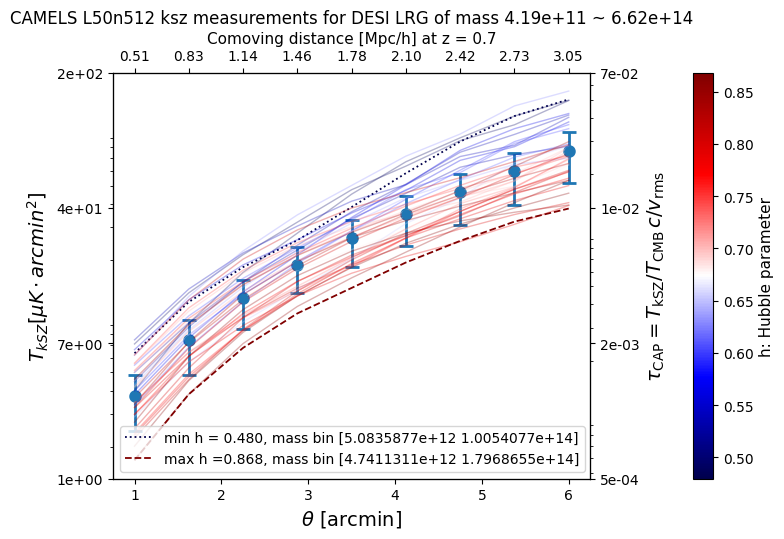

In [18]:
temp_ksz_sims_h = np.load('ksz_profiles_h_varying_sims.npy')
h = np.load('h_varying_vals.npy')
mass_halos_ranges = np.load('mass_halos_ranges_h_varying_sims.npy')

fig, ax1 = plt.subplots(figsize=(8,5.5))

# Original plot on left y-axis
ax1.scatter(theta, median*sr2sqarcmin, lw=3)
ax1.errorbar(theta, median*sr2sqarcmin, yerr=yerr, 
             fmt='o', capsize=5, capthick=2, linewidth=2, markersize=6)
h_log = np.log10(h)
for i in range(len(temp_ksz_sims_h)):
    if i == 0:
        ax1.plot(theta, temp_ksz_sims_h[i]*sr2sqarcmin, ls=':',linewidth=1.3, color=plt.cm.seismic((h_log[i] - h_log.min()) / (h_log.max() - h_log.min())),
            label =f'min h = {h[i]:.3f}, mass bin {mass_halos_ranges[i]}')
    elif i == len(temp_ksz_sims_h)-1:
         ax1.plot(theta, temp_ksz_sims_h[i]*sr2sqarcmin, ls='--',linewidth=1.3, color=plt.cm.seismic((h_log[i] - h_log.min()) / (h_log.max() - h_log.min())),
            label =f'max h ={h[i]:.3f}, mass bin {mass_halos_ranges[i]}')
    else:
        pass
        ax1.plot(theta, temp_ksz_sims_h[i]*sr2sqarcmin, linewidth=1, color=plt.cm.seismic((h_log[i] - h_log.min()) / (h_log.max() - h_log.min())),
                 alpha=0.3
            )
# Add colorbar for h values
sm = plt.cm.ScalarMappable(cmap=plt.cm.seismic, 
                          norm=plt.Normalize(vmin=h.min(), vmax=h.max()))
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax1, pad=0.15)  # pad=0.15 moves it farther right
cbar.set_label('h: Hubble parameter', size=11)
ax1.legend()
ax1.set_xlabel(r'$\theta$ [arcmin]', size=14)
ax1.set_ylabel(r'$T_{kSZ} [\mu K \cdot arcmin^2]$', size=14)
ax1.set_yscale('log')

# Set exactly 4 ticks on left y-axis
y1_min, y1_max = ax1.get_ylim()
y1_ticks = np.logspace(np.log10(y1_min), np.log10(y1_max), 4)
ax1.set_yticks(y1_ticks)
ax1.set_yticklabels([f'{tick:.0e}' for tick in y1_ticks])
ax1.tick_params(axis='y', which='both', left=True, right=False)

# Create second y-axis on the right
ax2 = ax1.twinx()

# Define the proportionality constant
conversion_factor = 1/(k.v_rms * k.TCMB* 1e6)  # Convert to optical depth units

# Set the limits to be proportional
ax2.set_ylim(y1_min * conversion_factor, y1_max * conversion_factor)
ax2.set_ylabel(r"$\tau_{\mathrm{CAP}} = T_{\mathrm{kSZ}}/T_{\mathrm{CMB}} \, c/v_{\mathrm{rms}}$", size=14)
ax2.set_yscale('log')

# Set exactly 4 ticks on right y-axis
y2_min, y2_max = ax2.get_ylim()
y2_ticks = np.logspace(np.log10(y2_min), np.log10(y2_max), 4)
ax2.set_yticks(y2_ticks)
ax2.set_yticklabels([f'{tick:.0e}' for tick in y2_ticks])
ax2.tick_params(axis='y', which='both', left=False, right=True)

# Create second x-axis on top for r_bins
ax3 = ax1.twiny()

# Calculate r_bins from theta
# Reverse the conversion: r_bins = AngDis * tan(theta_rad)
AngDis = k.AngDist(0.7) 
theta_rad = np.radians(theta / 60.)  # Convert theta from arcmin to radians
r_bins_calc = AngDis * np.tan(theta_rad)  # Calculate corresponding r_bins

# Set the same x-limits as the bottom axis
ax3.set_xlim(ax1.get_xlim())
ax3.set_xticks(theta)
ax3.set_xticklabels([f'{r:.2f}' for r in r_bins_calc])
ax3.set_xlabel(f'Comoving distance [Mpc/h] at z = 0.7', size=11)
plt.title('CAMELS L50n512 ksz measurements for DESI LRG of mass 4.19e+11 ~ 6.62e+14')
plt.tight_layout()
plt.savefig('204_sims_Tksz_CAP_z0.7_DESI_h_varying_sims.png')
plt.show()

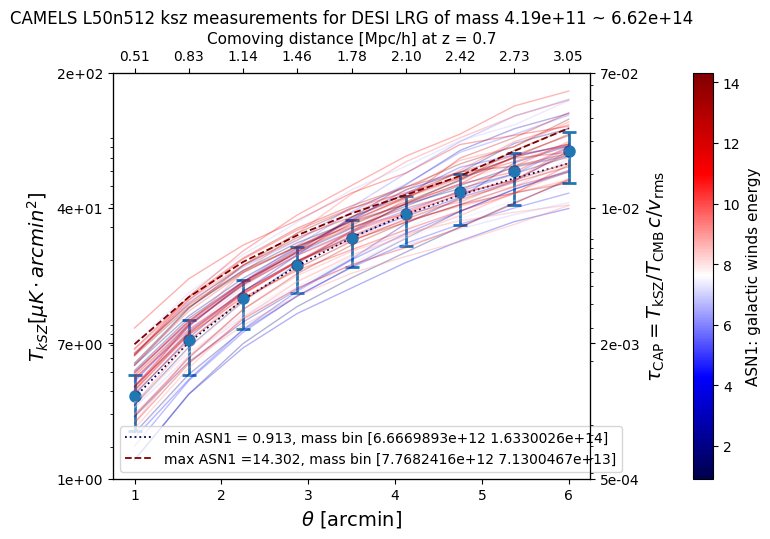

In [22]:
temp_ksz_sims_ASN1 = np.load('ksz_profiles_ASN1_varying_sims.npy')
ASN1 = np.load('ASN1_varying_vals.npy')
mass_halos_ranges = np.load('mass_halos_ranges_ASN1_varying_sims.npy')

fig, ax1 = plt.subplots(figsize=(8,5.5))

# Original plot on left y-axis
ax1.scatter(theta, median*sr2sqarcmin, lw=3)

ax1.errorbar(theta, median*sr2sqarcmin, yerr=yerr, 
             fmt='o', capsize=5, capthick=2, linewidth=2, markersize=6)
ASN1_log = np.log10(ASN1)
for i in range(len(temp_ksz_sims_AGN1)):
    if i == 0:
        ax1.plot(theta, temp_ksz_sims_ASN1[i]*sr2sqarcmin, ls=':',linewidth=1.3, color=plt.cm.seismic((ASN1_log[i] - ASN1_log.min()) / (ASN1_log.max() - ASN1_log.min())),
            label =f'min ASN1 = {ASN1[i]:.3f}, mass bin {mass_halos_ranges[i]}')
    elif i == len(temp_ksz_sims_AGN1)-1:
         ax1.plot(theta, temp_ksz_sims_ASN1[i]*sr2sqarcmin, ls='--',linewidth=1.3, color=plt.cm.seismic((ASN1_log[i] - ASN1_log.min()) / (ASN1_log.max() - ASN1_log.min())),
            label =f'max ASN1 ={ASN1[i]:.3f}, mass bin {mass_halos_ranges[i]}')
    else:
        pass
        ax1.plot(theta, temp_ksz_sims_ASN1[i]*sr2sqarcmin, linewidth=1, color=plt.cm.seismic((ASN1_log[i] - ASN1_log.min()) / (ASN1_log.max() - ASN1_log.min())),
                 alpha=0.3
            )
# Add colorbar for ASN1 values
sm = plt.cm.ScalarMappable(cmap=plt.cm.seismic, 
                          norm=plt.Normalize(vmin=ASN1.min(), vmax=ASN1.max()))
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax1, pad=0.15)  # pad=0.15 moves it farther right
cbar.set_label('ASN1: galactic winds energy', size=11)
ax1.legend()
ax1.set_xlabel(r'$\theta$ [arcmin]', size=14)
ax1.set_ylabel(r'$T_{kSZ} [\mu K \cdot arcmin^2]$', size=14)
ax1.set_yscale('log')

# Set exactly 4 ticks on left y-axis
y1_min, y1_max = ax1.get_ylim()
y1_ticks = np.logspace(np.log10(y1_min), np.log10(y1_max), 4)
ax1.set_yticks(y1_ticks)
ax1.set_yticklabels([f'{tick:.0e}' for tick in y1_ticks])
ax1.tick_params(axis='y', which='both', left=True, right=False)

# Create second y-axis on the right
ax2 = ax1.twinx()

# Define the proportionality constant
conversion_factor = 1/(k.v_rms * k.TCMB* 1e6)  # Convert to optical depth units

# Set the limits to be proportional
ax2.set_ylim(y1_min * conversion_factor, y1_max * conversion_factor)
ax2.set_ylabel(r"$\tau_{\mathrm{CAP}} = T_{\mathrm{kSZ}}/T_{\mathrm{CMB}} \, c/v_{\mathrm{rms}}$", size=14)
ax2.set_yscale('log')

# Set exactly 4 ticks on right y-axis
y2_min, y2_max = ax2.get_ylim()
y2_ticks = np.logspace(np.log10(y2_min), np.log10(y2_max), 4)
ax2.set_yticks(y2_ticks)
ax2.set_yticklabels([f'{tick:.0e}' for tick in y2_ticks])
ax2.tick_params(axis='y', which='both', left=False, right=True)

# Create second x-axis on top for r_bins
ax3 = ax1.twiny()

# Calculate r_bins from theta
# Reverse the conversion: r_bins = AngDis * tan(theta_rad)
AngDis = k.AngDist(0.7) 
theta_rad = np.radians(theta / 60.)  # Convert theta from arcmin to radians
r_bins_calc = AngDis * np.tan(theta_rad)  # Calculate corresponding r_bins

# Set the same x-limits as the bottom axis
ax3.set_xlim(ax1.get_xlim())
ax3.set_xticks(theta)
ax3.set_xticklabels([f'{r:.2f}' for r in r_bins_calc])
ax3.set_xlabel(f'Comoving distance [Mpc/h] at z = 0.7', size=11)
plt.title('CAMELS L50n512 ksz measurements for DESI LRG of mass 4.19e+11 ~ 6.62e+14')
plt.tight_layout()
plt.savefig('204_sims_Tksz_CAP_z0.7_DESI_ASN1_varying_sims.png')
plt.show()

In [51]:
DESI_2024_sigmaz_pzbin1 = np.load('Fig1_Fig8_dr10_allfoot_perbin_sigmaz0.0500_dr6_pzbin1.npz')
DESI_2024_sigmaz_corr_pzbin1 = np.load('Fig1_Fig8_dr10_allfoot_perbin_sigmaz0.0500_dr6_corr_pzbin1.npz')
DESI_2024_corr_pzbin1 = np.load('Fig1_Fig8_dr10_allfoot_perbin_dr6_corr_pzbin1.npz')
DESI_2024_M_12 = np.load('Fig4_mass_11.50_12.00.npz')
DESI_2024_M_13 = np.load('Fig4_mass_12.00_13.50.npz')

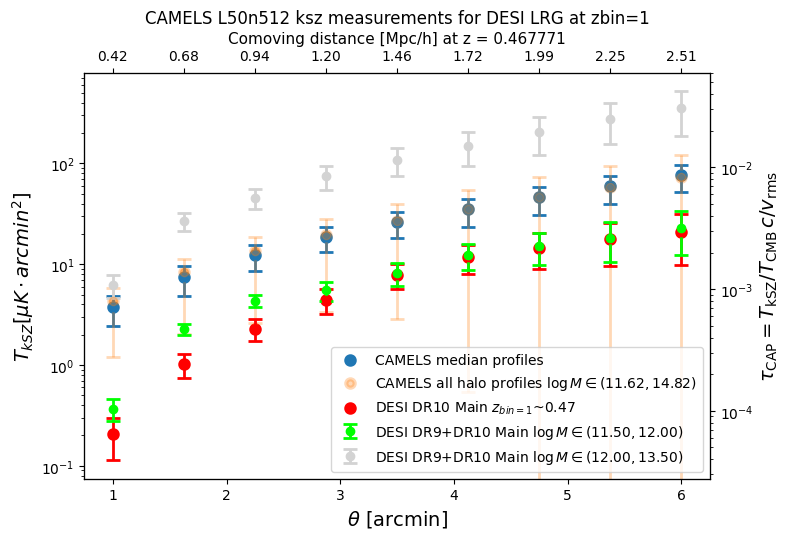

In [62]:

z = k.z

fig, ax1 = plt.subplots(figsize=(8,5.5))
upper = np.quantile(temp_ksz_sims, 0.25, axis=0)
lower = np.quantile(temp_ksz_sims, 0.75, axis=0)
median = np.median(temp_ksz_sims, axis=0)
yerr_lower = np.abs(median*sr2sqarcmin - lower*sr2sqarcmin)
yerr_upper =  np.abs(upper*sr2sqarcmin - median*sr2sqarcmin)
yerr = [yerr_lower, yerr_upper]
# Original plot on left y-axis
ax1.scatter(theta, median*sr2sqarcmin, lw=3, label='CAMELS median profiles')
ax1.errorbar(theta, median*sr2sqarcmin, yerr=yerr, 
             fmt='o', capsize=5, capthick=2, linewidth=2, markersize=6)

upper = np.quantile(temp_ksz_sims_all_halos, 0.25, axis=0)
lower = np.quantile(temp_ksz_sims_all_halos, 0.75, axis=0)
median = np.median(temp_ksz_sims_all_halos, axis=0)
yerr_lower = np.abs(median*sr2sqarcmin - lower*sr2sqarcmin)
yerr_upper =  np.abs(upper*sr2sqarcmin - median*sr2sqarcmin)
yerr = [yerr_lower, yerr_upper]
# Original plot on left y-axis
ax1.scatter(theta, median*sr2sqarcmin, lw=3, label='CAMELS all halo profiles '+rf"$\log M \in ({np.log10(4.19e+11):.2f}, {np.log10(6.62e+14):.2f})$",alpha=0.3)
ax1.errorbar(theta, median*sr2sqarcmin, yerr=yerr, 
             fmt='o', capsize=5, capthick=2, linewidth=2, markersize=6,alpha=0.3)

ax1.scatter(DESI_2024_sigmaz_corr_pzbin1['theta_arcmins'],DESI_2024_sigmaz_corr_pzbin1['prof'],color='r', lw=3, label='DESI DR10 Main '+r'$z_{bin=1}$~0.47')
ax1.errorbar(DESI_2024_sigmaz_corr_pzbin1['theta_arcmins'], DESI_2024_sigmaz_corr_pzbin1['prof'], yerr=np.sqrt(DESI_2024_sigmaz_corr_pzbin1['cov'].diagonal()), color='r',
             fmt='o',capsize=5, capthick=2, linewidth=2, markersize=6)
ax1.errorbar(DESI_2024_M_12['theta_arcmins'], DESI_2024_M_12['signal'], yerr=DESI_2024_M_12['noise'], color='lime',
             fmt='o', capsize=5, capthick=2, linewidth=2, markersize=6,label='DESI DR9+DR10 Main '+r"$\log M \in (11.50, 12.00)$")
ax1.errorbar(DESI_2024_M_13['theta_arcmins'], DESI_2024_M_13['signal'], yerr=DESI_2024_M_13['noise'], color='lightgrey',
             fmt='o', capsize=5, capthick=2, linewidth=2, markersize=6,label='DESI DR9+DR10 Main '+r"$\log M \in (12.00, 13.50)$")
ax1.legend()
ax1.set_xlabel(r'$\theta$ [arcmin]', size=14)
ax1.set_ylabel(r'$T_{kSZ} [\mu K \cdot arcmin^2]$', size=14)
ax1.set_yscale('log')

# # Set exactly 4 ticks on left y-axis
# y1_min, y1_max = ax1.get_ylim()
# y1_ticks = np.logspace(np.log10(y1_min), np.log10(y1_max), 4)
# ax1.set_yticks(y1_ticks)
# ax1.set_yticklabels([f'{tick:.0e}' for tick in y1_ticks])
# ax1.tick_params(axis='y', which='both', left=True, right=False)

# Create second y-axis on the right
ax2 = ax1.twinx()

# Define the proportionality constant
conversion_factor = 1/(k.v_rms * k.TCMB* 1e6)  # Convert to optical depth units

# Set the limits to be proportional
ax2.set_ylim(y1_min * conversion_factor, y1_max * conversion_factor)
ax2.set_ylabel(r"$\tau_{\mathrm{CAP}} = T_{\mathrm{kSZ}}/T_{\mathrm{CMB}} \, c/v_{\mathrm{rms}}$", size=14)
ax2.set_yscale('log')

# Set exactly 4 ticks on right y-axis
# y2_min, y2_max = ax2.get_ylim()
# y2_ticks = np.logspace(np.log10(y2_min), np.log10(y2_max), 4)
# ax2.set_yticks(y2_ticks)
# ax2.set_yticklabels([f'{tick:.0e}' for tick in y2_ticks])
# ax2.tick_params(axis='y', which='both', left=False, right=True)

# Create second x-axis on top for r_bins
ax3 = ax1.twiny()

# Calculate r_bins from theta
# Reverse the conversion: r_bins = AngDis * tan(theta_rad)
AngDis = k.AngDist(z) 
theta_rad = np.radians(theta / 60.)  # Convert theta from arcmin to radians
r_bins_calc = AngDis * np.tan(theta_rad)  # Calculate corresponding r_bins

# Set the same x-limits as the bottom axis
ax3.set_xlim(ax1.get_xlim())
ax3.set_xticks(theta)
ax3.set_xticklabels([f'{r:.2f}' for r in r_bins_calc])
ax3.set_xlabel(f'Comoving distance [Mpc/h] at z = {z:3f}', size=11)
plt.title('CAMELS L50n512 ksz measurements for DESI LRG at zbin=1')
plt.tight_layout()
plt.savefig('../figs/CAMELS_DESI_Tksz_CAP_z0.47.png')
plt.show()

In [55]:
DESI_2024_corr_pzbin1['theta_arcmins'],DESI_2024_corr_pzbin1['prof'],DESI_2024_corr_pzbin1['cov'].shape

(array([1.   , 1.625, 2.25 , 2.875, 3.5  , 4.125, 4.75 , 5.375, 6.   ]),
 array([ 0.18467629,  0.7943909 ,  2.0789506 ,  4.446452  ,  7.671667  ,
        11.434378  , 14.724975  , 18.605701  , 22.464869  ], dtype=float32),
 (9, 9))

In [30]:
DESI_2024_sigmaz_corr_pzbin1['theta_arcmins'],DESI_2024_sigmaz_corr_pzbin1['prof'],DESI_2024_sigmaz_corr_pzbin1['cov'].shape

(array([1.   , 1.625, 2.25 , 2.875, 3.5  , 4.125, 4.75 , 5.375, 6.   ]),
 array([ 0.20632046,  1.012095  ,  2.2940187 ,  4.4485455 ,  7.8253307 ,
        11.689642  , 14.623427  , 17.641985  , 20.744026  ], dtype=float32),
 (9, 9))

In [44]:
np.log10(mass_halos_ranges.flatten().mean())

13.782388